In [0]:
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.utils import np_utils

In [0]:
with open('train_image.pkl', 'rb') as f:
    train_images = pickle.load(f)

with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)

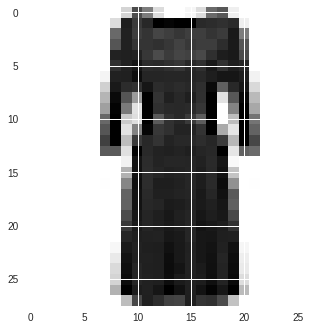

In [27]:
train_images = np.array(train_images).reshape((8000, 28, 28, 1)).astype('uint8')
img = Image.fromarray(train_images[5000].reshape((28, 28)).astype('uint8'), 'L')
plt.imshow(img)

In [28]:
for i in range(len(train_labels)):
  if train_labels[i] == 2:
    train_labels[i] = 1
  elif train_labels[i] == 3:
    train_labels[i] = 2
  elif train_labels[i] == 6:
    train_labels[i] = 3
    
print(set(train_labels))

{0, 1, 2, 3}


1
(8000, 4)
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


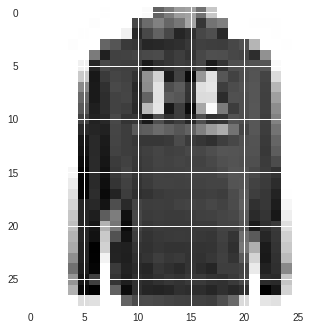

In [29]:
train_images, train_labels = shuffle(train_images, train_labels)
img = Image.fromarray(train_images[5000].reshape((28, 28)).astype('uint8'), 'L')
print(train_labels[5000])
plt.imshow(img)

train_images = train_images.astype('float32')/255.0
train_labels = np_utils.to_categorical(train_labels, 4)
print(train_labels.shape)
print(train_labels)

In [30]:
model = Sequential()
inputShape = (28, 28, 1)


model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [0]:
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="min", period=1)

stop = EarlyStopping(monitor="val_loss", patience=50, mode="min")

In [32]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
history = model.fit(train_images, train_labels, validation_split = 0.2, shuffle = True, batch_size = 256, epochs=200, callbacks=[checkpoint,  stop])

Train on 6400 samples, validate on 1600 samples
Epoch 1/200
6400/6400 [==============================] - 4s 633us/step - loss: 1.2173 - acc: 0.6573 - val_loss: 0.6547 - val_acc: 0.7706

Epoch 00001: val_loss improved from inf to 0.65473, saving model to model-0.65.h5
Epoch 2/200
6400/6400 [==============================] - 2s 238us/step - loss: 0.7727 - acc: 0.7445 - val_loss: 0.4736 - val_acc: 0.8275

Epoch 00002: val_loss improved from 0.65473 to 0.47358, saving model to model-0.47.h5
Epoch 3/200
6400/6400 [==============================] - 2s 239us/step - loss: 0.6335 - acc: 0.7783 - val_loss: 0.4523 - val_acc: 0.8381

Epoch 00003: val_loss improved from 0.47358 to 0.45230, saving model to model-0.45.h5
Epoch 4/200
6400/6400 [==============================] - 2s 238us/step - loss: 0.5639 - acc: 0.8028 - val_loss: 0.4099 - val_acc: 0.8475

Epoch 00004: val_loss improved from 0.45230 to 0.40992, saving model to model-0.41.h5
Epoch 5/200
6400/6400 [==============================] - 2s 